## 回归分析的 numpy 实现

### 回归模型主体：

In [16]:
import numpy as np

def linear_loss(X, y, w, b):
    num_train = X.shape[0]
    num_feature = X.shape[1]
    # 模型公示
    y_hat = np.dot(X,w) + b
    # 损失函数
    loss = np.sum((y_hat - y)**2) / num_train
    # 参数的偏导
    dw = np.dot(X.T, (y_hat - y)) / num_train
    db = np.sum((y_hat - y)) / num_train
    return y_hat, loss, dw, db

### 参数初始化：

In [17]:
def initialize_params(dims):
    w = np.zeros((dims, 1))
    b = 0
    return w, b

### 基于梯度下降的模型训练过程：

In [18]:
def linar_train(X, y, leraning_rate, epochs):
    w, b = initialize_params(X.shape[1])
    loss_list = []
    for i in range(1, epochs):
        y_hat, loss, dw, db = linear_loss(X, y, w, b)
        loss_list.append(loss)
        w += -leraning_rate * dw
        b += -leraning_rate * db

        if i % 10000 == 0:
            print('epoch %d loss %f' % (i, loss))

        params = {
            'w' : w,
            'b' : b
        }

        grads = {
            'dw' : dw,
            'db' : db
        }

    return loss_list, loss, params, grads

### 数据准备:

In [19]:
from sklearn.datasets import load_diabetes
from sklearn.utils import shuffle

diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target

# 打乱数据
X, y = shuffle(data, target, random_state=13)
X = X.astype(np.float32)

# 训练集与测试集的简单划分
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

print('X_train=', X_train.shape)
print('X_test=', X_test.shape)
print('y_train=', y_train.shape)
print('y_test=', y_test.shape)

X_train= (397, 10)
X_test= (45, 10)
y_train= (397, 1)
y_test= (45, 1)


### 执行训练：

In [20]:
loss_list, loss, params, grads = linar_train(X_train, y_train, 0.001, 100000)

epoch 10000 loss 5533.039734
epoch 20000 loss 5217.582409
epoch 30000 loss 4949.676466
epoch 40000 loss 4721.504031
epoch 50000 loss 4526.567333
epoch 60000 loss 4359.463960
epoch 70000 loss 4215.700505
epoch 80000 loss 4091.538010
epoch 90000 loss 3983.863771


### 查看训练得到的回归模型参数值：

In [21]:
print(params)

{'w': array([[  44.07229775],
       [  -6.99872355],
       [ 157.0665895 ],
       [ 118.32921584],
       [  37.47920655],
       [  24.97681831],
       [-104.31188822],
       [ 104.03504877],
       [ 148.85521477],
       [  94.07047013]]), 'b': 151.57222424703687}


### 下面定义一个预测函数对测试集结果进行预测：

In [22]:
def predict(X, params):
    w = params['w']
    b = params['b']

    y_pred = np.dot(X, w) + b
    return  y_pred

y_pred = predict(X_test, params)
y_pred[:5]

array([[132.02545017],
       [141.77423134],
       [150.48352021],
       [128.48666753],
       [147.29312454]])

### 利用matplotlib 对预测结果和真值进行展示：

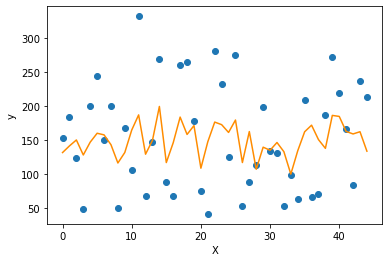

In [23]:
import matplotlib.pyplot as plt
f = X_test.dot(params['w']) + params['b']

plt.scatter(range(X_test.shape[0]), y_test)
plt.plot(f, color = 'darkorange')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### 训练过程中损失的下降：

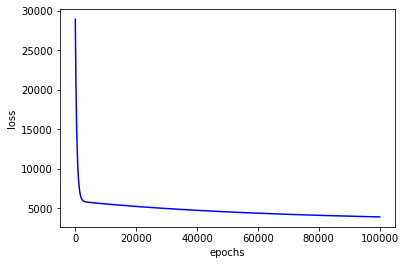

In [24]:
plt.plot(loss_list, color = 'blue')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()